In [1]:
#!pip install -U sentence-transformers

  Using cached sentence_transformers-3.0.1-py3-none-any.whl (227 kB)
  Using cached transformers-4.43.1-py3-none-any.whl (9.4 MB)
  Using cached torch-2.3.1-cp311-cp311-win_amd64.whl (159.8 MB)
  Using cached mkl-2021.4.0-py2.py3-none-win_amd64.whl (228.5 MB)
  Using cached tokenizers-0.19.1-cp311-none-win_amd64.whl (2.2 MB)
  Using cached safetensors-0.4.3-cp311-none-win_amd64.whl (287 kB)
  Using cached intel_openmp-2021.4.0-py2.py3-none-win_amd64.whl (3.5 MB)
  Using cached tbb-2021.13.0-py3-none-win_amd64.whl (286 kB)
  Attempting uninstall: transformers
    Found existing installation: transformers 2.1.1
    Uninstalling transformers-2.1.1:
      Successfully uninstalled transformers-2.1.1


In [2]:
!pip install fitz
!pip install tqdm

In [3]:
!pip install PyMuPDF


In [1]:
import os
import requests

pdf_path = r"G:\books\Human-Nutrition-2020-Edition-1598491699.pdf"

if not os.path.exists(pdf_path):
    print(f"[Info] File doesn't exists, downloading....")
    url = "https://pressbooks.oer.hawaii.edu/humannutrition2/open/download?type=pdf"
    filename = pdf_path
    #get method
    response = requests.get(url)
    if response.status_code == 200:
        with open("filename", "wb") as f:
            f.write(response.content)
        print(f"The file is being downloaded as {filename}")
    else:
        print(f"[INFO] Failed to download the file {response.status_code}")
        
else:
    print(f"File {pdf_path} exists!")
    

File G:\books\Human-Nutrition-2020-Edition-1598491699.pdf exists!


In [5]:
!pip install PyMuPDF


In [2]:
#!pip install fitz
import fitz
import tqdm
#cleaning and looking into the data
def text_formatter(text: str) -> str:
    cleaned_text = text.replace("\n", " ").strip()
    return cleaned_text

def open_read_pdf(pdf_path : str) -> list[dict]:
    doc = fitz.open(pdf_path)
    pages_n_text = []
    for page_no, page in enumerate(doc):
        text = page.get_text()
        text = text_formatter(text = text)
        pages_n_text.append({ "page_no": page_no - 41,
                           "page_char_count": len(text),
                           "page_sentence_count": len(text.split(". ")),
                           "page_word_count": len(text.split(" ")),
                           "tokens": len(text)/4, 
                            "text" : text})
        
    return pages_n_text

page_n_text = open_read_pdf(pdf_path = pdf_path)
page_n_text[:2]

[{'page_no': -41,
  'page_char_count': 29,
  'page_sentence_count': 1,
  'page_word_count': 4,
  'tokens': 7.25,
  'text': 'Human Nutrition: 2020 Edition'},
 {'page_no': -40,
  'page_char_count': 0,
  'page_sentence_count': 1,
  'page_word_count': 1,
  'tokens': 0.0,
  'text': ''}]

In [3]:
import random
random.sample(page_n_text,k = 2)

[{'page_no': 712,
  'page_char_count': 1834,
  'page_sentence_count': 19,
  'page_word_count': 340,
  'tokens': 458.5,
  'text': 'EAR values become the scientific foundation upon which RDA  values are set.  2. Recommended Daily Allowances. Once the EAR of a nutrient  has been established, the RDA can be mathematically  determined. While the EAR is set at a point that meets the  needs of half the population, RDA values are set to meet the  needs of the vast majority (97 to 98 percent) of the target  healthy population. It is important to note that RDAs are not  the same thing as individual nutritional requirements. The  actual nutrient needs of a given individual will be different  than the RDA. However, since we know that 97 to 98 percent of  the population’s needs are met by the RDA, we can assume that  if a person is consuming the RDA of a given nutrient, they are  most likely meeting their nutritional need for that nutrient.  The important thing to remember is that the RDA is meant 

In [4]:
import pandas as pd


In [5]:
df = pd.DataFrame(page_n_text)
df.iloc[3]
df.describe().round(2)


,page_no,page_char_count,page_sentence_count,page_word_count,tokens
count,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1148.59,9.97,198.89,287.15
std,348.86,560.44,6.19,95.75,140.11
min,-41.00,0.00,1.00,1.00,0.00
25%,260.75,762.75,4.00,134.00,190.69
50%,562.50,1232.50,10.00,215.00,308.12
75%,864.25,1605.25,14.00,271.25,401.31
max,1166.00,2308.00,32.00,429.00,577.00


why tokens are rqd?
LLMS can't take infinte tokens
Embedding also has a range of tokens.

EX:
A embedding model has been trained to embed 384 tokens into numerical space.(all-mpnet-base-v2)

Splitting big chunks of text into sentences

In [6]:
from spacy.lang.en import English

nlp = English()
nlp.add_pipe("sentencizer")
#doc instance
doc = nlp("I am great.I am learning")
assert len(list(doc.sents)) == 2

list(doc.sents)

[I am great., I am learning]

In [7]:
for item in page_n_text:
    #using spacy
    item['sentences']  = list(nlp(item["text"]).sents)
    item['sentences'] = [str(sentence) for sentence in item['sentences'] ]
    item['page_sentence_count_spacy'] = len(item['sentences'])

In [8]:
import random


In [9]:
page_n_text[0]

{'page_no': -41,
 'page_char_count': 29,
 'page_sentence_count': 1,
 'page_word_count': 4,
 'tokens': 7.25,
 'text': 'Human Nutrition: 2020 Edition',
 'sentences': ['Human Nutrition: 2020 Edition'],
 'page_sentence_count_spacy': 1}

In [10]:
random.sample(page_n_text , k = 1)

[{'page_no': 985,
  'page_char_count': 67,
  'page_sentence_count': 3,
  'page_word_count': 15,
  'tokens': 16.75,
  'text': 'PART\xa0XVII  CHAPTER 17. FOOD SAFETY  Chapter 17. Food Safety  |  985',
  'sentences': ['PART\xa0XVII  CHAPTER 17.',
   'FOOD SAFETY  Chapter 17.',
   'Food Safety  |  985'],
  'page_sentence_count_spacy': 3}]

In [11]:
df = pd.DataFrame(page_n_text)
df.describe().round(2)

,page_no,page_char_count,page_sentence_count,page_word_count,tokens,page_sentence_count_spacy
count,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1148.59,9.97,198.89,287.15,10.32
std,348.86,560.44,6.19,95.75,140.11,6.30
min,-41.00,0.00,1.00,1.00,0.00,0.00
25%,260.75,762.75,4.00,134.00,190.69,5.00
50%,562.50,1232.50,10.00,215.00,308.12,10.00
75%,864.25,1605.25,14.00,271.25,401.31,15.00
max,1166.00,2308.00,32.00,429.00,577.00,28.00


In [12]:
#splitting group of sentences into smaller chunks
num_sentence_split_range = 10

def split_list(input_list = list[str],
              slice_size = num_sentence_split_range) -> list[list[str]]:
    return [input_list[i : i + slice_size] for i in range(0, len(input_list), slice_size)]

test_l = list(range(30))
split_list(test_l)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]]

In [13]:
#trying with sentences
test_sen = "I am going to complete my task"
split_list(test_sen)

['I am going', ' to comple', 'te my task']

In [14]:
for item in page_n_text:
    item["sentences_chunks"] = split_list(input_list = item['sentences'],
                                  slice_size= num_sentence_split_range)
    item['num_chunks'] = len(item["sentences"])
    
item["sentences_chunks"] =(item["sentences_chunks"])
print(type(item["sentences_chunks"]))

<class 'list'>


In [15]:
random.sample(page_n_text, k = 2)

[{'page_no': 511,
  'page_char_count': 321,
  'page_sentence_count': 2,
  'page_word_count': 45,
  'tokens': 80.25,
  'text': 'http:/ /pressbooks.oer.hawaii.edu/ humannutrition2/?p=317  \xa0 An interactive or media element has been  excluded from this version of the text. You can  view it online here:  http:/ /pressbooks.oer.hawaii.edu/ humannutrition2/?p=317  Dietary, Behavioral, and Physical Activity Recommendations for Weight Management  |  511',
  'sentences': ['http:/ /pressbooks.oer.hawaii.edu/ humannutrition2/?p=317  \xa0 An interactive or media element has been  excluded from this version of the text.',
   'You can  view it online here:  http:/ /pressbooks.oer.hawaii.edu/ humannutrition2/?p=317  Dietary, Behavioral, and Physical Activity Recommendations for Weight Management  |  511'],
  'page_sentence_count_spacy': 2,
  'sentences_chunks': [['http:/ /pressbooks.oer.hawaii.edu/ humannutrition2/?p=317  \xa0 An interactive or media element has been  excluded from this version of 

In [16]:
df = pd.DataFrame(page_n_text)
df.describe().round(2)

,page_no,page_char_count,page_sentence_count,page_word_count,tokens,page_sentence_count_spacy,num_chunks
count,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1148.59,9.97,198.89,287.15,10.32,10.32
std,348.86,560.44,6.19,95.75,140.11,6.30,6.30
min,-41.00,0.00,1.00,1.00,0.00,0.00,0.00
25%,260.75,762.75,4.00,134.00,190.69,5.00,5.00
50%,562.50,1232.50,10.00,215.00,308.12,10.00,10.00
75%,864.25,1605.25,14.00,271.25,401.31,15.00,15.00
max,1166.00,2308.00,32.00,429.00,577.00,28.00,28.00


In [17]:
import re
#regex
pages_and_chunks = []

for item in page_n_text:
    for sentence_chunk in item["sentences_chunks"]:
        chunk_dict = {}
        chunk_dict["page_number"] = item["page_no"]
        #print(chunk_dict["page_number"])
        #print(type(item["sentences_chunks"]))
        #joining sentences into paragraph
        #joined_sentence_chunk = str(item["sentences_chunks"]).replace("  "," ").strip()
        joined_sentence_chunk = str(item["sentences_chunks"]).replace(', ',"").strip()
        joined_sentence_chunk = re.sub(r'\.([A-Z])',r'.\1', joined_sentence_chunk) #will convert ".A" ----> ". A"
        
        chunk_dict["joined_sentence_chunk"] = joined_sentence_chunk
        
        #stats
        chunk_dict["chunk_char_count"] = len(joined_sentence_chunk)
        chunk_dict["chunk_word_count"] = len([word for word in joined_sentence_chunk.split(" ")])
        chunk_dict["chunk_token_count"] = len(joined_sentence_chunk)/ 4
        
        pages_and_chunks.append(chunk_dict)
        
len(pages_and_chunks)


1843

In [18]:
df = pd.DataFrame(data= pages_and_chunks)
df.describe().round()

,page_number,chunk_char_count,chunk_word_count,chunk_token_count
count,1843.0,1843.0,1843.0,1843.0
mean,583.0,1327.0,206.0,332.0
std,348.0,500.0,76.0,125.0
min,-41.0,23.0,4.0,6.0
25%,280.0,1023.0,165.0,256.0
50%,586.0,1444.0,220.0,361.0
75%,890.0,1690.0,260.0,422.0
max,1166.0,2290.0,391.0,572.0


In [19]:
random.sample(pages_and_chunks, k = 2)

[{'page_number': 718,
  'joined_sentence_chunk': "[['Discovering Nutrition Facts  UNIVERSITY OF HAWAI‘I AT MĀNOA FOOD SCIENCE AND HUMAN  NUTRITION PROGRAM AND HUMAN NUTRITION PROGRAM  The Labels on Your Food  Understanding the significance of dietary guidelines and how to  use DRIs in planning your nutrient intakes can make you better  equipped to select the right foods the next time you go to the  supermarket.'' In the United Statesthe Nutrition Labeling and Education Act  (NLEA) passed in 1990 and came into effect in 1994.''In Canada mandatory labeling came into effect in 2005.''As a resultall  packaged foods sold in the United States and Canada must have  nutrition labels that accurately reflect the contents of the food  products.''There are several mandated nutrients and some optional  ones that manufacturers or packagers include.'' In May2016 a new Nutrition Facts label for packaged foods beverages and dietary supplements was announced.''This label  reflects new scientific informa

In [20]:
min_chunk_token_count = 30
count = 0

for row in df[df["chunk_token_count"] <= min_chunk_token_count].sample(10).iterrows():
    count +=1
    print(f"Chunks token count: {row[1]['chunk_token_count']}")
print(f"The rows which contain less than minimun tokens: {count}")

Chunks token count: 26.5
Chunks token count: 20.0
Chunks token count: 27.25
Chunks token count: 6.25
Chunks token count: 17.0
Chunks token count: 26.0
Chunks token count: 24.75
Chunks token count: 23.75
Chunks token count: 19.75
Chunks token count: 24.0
The rows which contain less than minimun tokens: 10


In [21]:
#filter records which has above 30 tokens
pages_chunks_over_min_tokens = df[df["chunk_token_count"]> min_chunk_token_count].to_dict(orient = 'records')
pages_chunks_over_min_tokens[-5:]

#filter records which has above 30 tokens
pages_chunks_under_min_tokens = df[df["chunk_token_count"] <= min_chunk_token_count].to_dict(orient = 'records')
pages_chunks_under_min_tokens[-5:]

[{'page_number': 985,
  'joined_sentence_chunk': "[['PART\\xa0XVII  CHAPTER 17.''FOOD SAFETY  Chapter 17.''Food Safety  |  985']]",
  'chunk_char_count': 78,
  'chunk_word_count': 13,
  'chunk_token_count': 19.5},
 {'page_number': 991,
  'joined_sentence_chunk': "[['http:/ /pressbooks.oer.hawaii.edu/ humannutrition2/?p=519  \\xa0 Introduction  |  991']]",
  'chunk_char_count': 90,
  'chunk_word_count': 10,
  'chunk_token_count': 22.5},
 {'page_number': 996,
  'joined_sentence_chunk': "[['http:/ /pressbooks.oer.hawaii.edu/ humannutrition2/?p=521  \\xa0 996  |  The Major Types of Foodborne Illness']]",
  'chunk_char_count': 114,
  'chunk_word_count': 15,
  'chunk_token_count': 28.5},
 {'page_number': 1041,
  'joined_sentence_chunk': "[['PART\\xa0XVIII  CHAPTER 18.'' NUTRITIONAL ISSUES  Chapter 18.''Nutritional Issues  |  1041']]",
  'chunk_char_count': 95,
  'chunk_word_count': 14,
  'chunk_token_count': 23.75},
 {'page_number': 1149,
  'joined_sentence_chunk': "[['PART\\xa0XIX  APPENDIC

In [22]:
random.sample(pages_chunks_over_min_tokens, k = 1)

[{'page_number': 36,
  'joined_sentence_chunk': "[['Experimental test.''Coindet administered iodine tincture orally to  his patients with goiter.'' Interpret results.''Coindet’s iodine treatment was successful.'' \\xa0 Hypothesis.''French chemist Chatin proposed that the low iodine  content in food and water in certain areas far away from the ocean  was the primary cause of goiterand renounced the theory that  goiter was the result of poor hygiene.'' Experimental test.''In the late 1860s the program“The stamping- out of goiter,” started with people in several villages in France being  given iodine tablets.'' Results.''The program was effective and 80 percent of goitrous  children were cured.'][' \\xa0 Hypothesis.''In 1918Swiss doctor Bayard proposed iodizing salt as  a good way to treat areas endemic with goiter.'' Experimental test.''Iodized salt was transported by mules to a  small village at the base of the Matterhorn where more than 75  percent of school children were goitrous.''It

In [23]:
random.sample(pages_chunks_under_min_tokens, k = 1)

[{'page_number': 566,
  'joined_sentence_chunk': "[['Image by  Allison  Calabrese /  CC BY 4.0  Figure 9.13 Niacin DeficiencyPellagra  566  |  Water-Soluble Vitamins']]",
  'chunk_char_count': 118,
  'chunk_word_count': 23,
  'chunk_token_count': 29.5}]

In [24]:
from sentence_transformers import SentenceTransformer
embed_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

#targeted sentence that want to encode
test_sen = ['I am learning how to encode.','hello']
embeddings = embed_model.encode(test_sen)
test_sen_dict = dict(zip(test_sen, embeddings))

for sentences, embedding in test_sen_dict.items():
    print(f"Sentences: {sentences}")
    print(f"Embedding: {embeddings}")
    print(f"Embedding shape: {embeddings[0].shape}")
    print("\n")



C:\Users\Amogh\anaconda3\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


Sentences: I am learning how to encode.
Embedding: [[-7.46155903e-02  2.72197843e-01 -6.01287365e-01 -4.70794439e-01
   1.39084533e-01  6.28371835e-02  3.84253055e-01 -3.29041064e-01
  -2.85437196e-01  2.27416366e-01 -1.20166160e-01 -9.13999081e-02
  -2.58455187e-01  1.58748284e-01 -2.20847532e-01  1.18509255e-01
  -2.47332409e-01  4.59454954e-01 -1.25361115e-01 -7.92469800e-01
   6.07421756e-01  1.60733551e-01  1.61121294e-01 -1.55290946e-01
   1.68903992e-01  4.61014748e-01  1.54409662e-01  5.65169826e-02
   3.01602185e-01 -6.53961599e-01  1.03638113e-01 -8.24963599e-02
   4.80767637e-01  1.85416266e-01 -2.94955492e-01 -9.63082165e-03
   2.06072360e-01  4.09184128e-01 -4.09494862e-02 -3.54223907e-01
  -1.18471637e-01  4.61741798e-02 -2.52610922e-01  1.09598920e-01
   5.06579041e-01 -1.20739423e-01 -4.40171480e-01  5.08030541e-02
   2.54043899e-02  1.05048276e-01  4.90897428e-03  2.59834349e-01
  -4.44753468e-01  1.11365750e-01 -3.56059849e-01  2.19481066e-01
   3.73312645e-02  3.4430

In [25]:
embeddings[0].shape

(384,)

In [26]:
p = pd.DataFrame(data = pages_chunks_over_min_tokens)
p.describe().round(2)

,page_number,chunk_char_count,chunk_word_count,chunk_token_count
count,1804.00,1804.00,1804.00,1804.00
mean,584.61,1354.28,209.73,338.57
std,347.87,470.36,71.68,117.59
min,-39.00,122.00,16.00,30.50
25%,281.00,1062.00,171.00,265.50
50%,588.50,1462.00,221.00,365.50
75%,890.25,1700.00,260.00,425.00
max,1166.00,2290.00,391.00,572.50


In [34]:
import torch 

devices = "cuda" if torch.cuda.is_available() else "cpu"

In [35]:
%%time
embed_model.to(devices)

for item in pages_chunks_over_min_tokens:
    
    item['embed_item'] = embed_model.encode(item['joined_sentence_chunk'])
    
    

CPU times: total: 9min 14s
Wall time: 3min 24s


In [36]:
%%time
text_chunks = [item['joined_sentence_chunk'] for item in pages_chunks_over_min_tokens ]
text_chunks[52]

CPU times: total: 0 ns
Wall time: 1e+03 µs


"[['Protein  Necessary for tissue formationcell reparationand  hormone and enzyme production.''It is essential for  building strong muscles and a healthy immune system.'' Carbohydrates  Provide a ready source of energy for the body and  provide structural constituents for the formation of  cells.'' Fat  Provides stored energy for the bodyfunctions as  structural components of cells and also as signaling  molecules for proper cellular communication.''It  provides insulation to vital organs and works to  maintain body temperature.'' Vitamins  Regulate body processes and promote normal  body-system functions.'' Minerals  Regulate body processesare necessary for proper  cellular functionand comprise body tissue.'' Water  Transports essential nutrients to all body parts transports waste products for disposaland aids with  body temperature maintenance.'' \\xa0 Learning Activities  Technology Note: The second edition of the Human  Nutrition Open Educational Resource (OER) textbook  features i

In [37]:
%%time 
#now embedding in batches 

embed_model.to(devices)

for item in pages_chunks_over_min_tokens:
    item['text_chunks_embedding'] = embed_model.encode(item['joined_sentence_chunk'], 
                                                      batch_size= 32)
                                                      #convert_to_tensor=True)

CPU times: total: 9min 13s
Wall time: 3min 19s


In [38]:
%%time

text_chunk_embed = [item['joined_sentence_chunk'] for item in pages_chunks_over_min_tokens]
text_chunk_embed[52]

CPU times: total: 0 ns
Wall time: 0 ns


"[['Protein  Necessary for tissue formationcell reparationand  hormone and enzyme production.''It is essential for  building strong muscles and a healthy immune system.'' Carbohydrates  Provide a ready source of energy for the body and  provide structural constituents for the formation of  cells.'' Fat  Provides stored energy for the bodyfunctions as  structural components of cells and also as signaling  molecules for proper cellular communication.''It  provides insulation to vital organs and works to  maintain body temperature.'' Vitamins  Regulate body processes and promote normal  body-system functions.'' Minerals  Regulate body processesare necessary for proper  cellular functionand comprise body tissue.'' Water  Transports essential nutrients to all body parts transports waste products for disposaland aids with  body temperature maintenance.'' \\xa0 Learning Activities  Technology Note: The second edition of the Human  Nutrition Open Educational Resource (OER) textbook  features i

In [42]:
#storing in df
texts_chunks_and_embedding_df = pd.DataFrame(data= pages_chunks_over_min_tokens)
pages_chunk_over_embed_df_path = r"C:\Users\Amogh\python_llms\texts_chunks_and_embedding_df.csv"
texts_chunks_and_embedding_df.to_csv(pages_chunk_over_embed_df_path, index= False)

In [43]:
pages_chunk_over_embed_df_load = pd.read_csv("texts_chunks_and_embedding_df.csv")
texts_chunks_and_embedding_df.head()

,page_number,joined_sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embed_item,text_chunks_embedding
0,-39,[['Human Nutrition: 2020 Edition UNIVERSITY ...,306,44,76.50,"[-0.34628856, 0.11873175, 0.19786371, 0.135284...","[-0.34628856, 0.11873175, 0.19786371, 0.135284..."
1,-38,[['Human Nutrition: 2020 Edition by University...,216,31,54.00,"[-0.2135142, 0.15911552, 0.016583482, 0.013773...","[-0.2135142, 0.15911552, 0.016583482, 0.013773..."
2,-37,[['Contents Preface University of Hawai‘i at...,810,144,202.50,"[-0.45600495, 0.50179064, 0.44888175, 0.094657...","[-0.45600495, 0.50179064, 0.44888175, 0.094657..."
3,-36,[['Lifestyles and Nutrition University of Haw...,987,174,246.75,"[-0.27359527, 0.46020588, 0.55021524, 0.259538...","[-0.27359527, 0.46020588, 0.55021524, 0.259538..."
4,-35,[['The Cardiovascular System University of Ha...,1043,191,260.75,"[-0.31235683, 0.42378852, 0.520691, 0.26785356...","[-0.31235683, 0.42378852, 0.520691, 0.26785356..."


In [44]:
texts_chunks_and_embedding_df = texts_chunks_and_embedding_df.drop('embed_item', axis=1)

In [45]:
import torch 
import numpy as np

texts_chunks_and_embedding_df = pd.read_csv('texts_chunks_and_embedding_df.csv')

#converting into dictionary
pages_and_chunks = texts_chunks_and_embedding_df.to_dict(orient="records")

#convert the embeddning col into numpy array
texts_chunks_and_embedding_df['text_chunks_embedding'] = texts_chunks_and_embedding_df['text_chunks_embedding'].apply(lambda x: np.fromstring(x.strip('[]'), sep=' '))

#now converting numpy array to tensors
text_embedding = torch.tensor(np.stack(texts_chunks_and_embedding_df['text_chunks_embedding'].tolist(), axis= 0)).to(devices)


texts_chunks_and_embedding_df = texts_chunks_and_embedding_df.drop('embed_item', axis=1)
texts_chunks_and_embedding_df.head(-5)

,page_number,joined_sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,text_chunks_embedding
0,-39,[['Human Nutrition: 2020 Edition UNIVERSITY ...,306,44,76.50,"[-0.346288562, 0.118731752, 0.197863713, 0.135..."
1,-38,[['Human Nutrition: 2020 Edition by University...,216,31,54.00,"[-0.213514194, 0.159115523, 0.0165834818, 0.01..."
2,-37,[['Contents Preface University of Hawai‘i at...,810,144,202.50,"[-0.45600495, 0.50179064, 0.44888175, 0.094657..."
3,-36,[['Lifestyles and Nutrition University of Haw...,987,174,246.75,"[-0.273595273, 0.460205883, 0.550215244, 0.259..."
4,-35,[['The Cardiovascular System University of Ha...,1043,191,260.75,"[-0.31235683, 0.42378852, 0.520691, 0.26785356..."
...,...,...,...,...,...,...
1794,1161,[['Mariana Ruiz / Public Domain 22.''Exercise...,1654,233,413.50,"[-0.263400853, -0.0725437179, -0.105934493, 0...."
1795,1161,[['Mariana Ruiz / Public Domain 22.''Exercise...,1654,233,413.50,"[-0.263400853, -0.0725437179, -0.105934493, 0...."
1796,1162,[['39.''Exercise 10.2 & 11.3 reused “Egg Oval ...,1749,235,437.25,"[-0.138966113, 0.144967526, -0.00548877614, -0..."
1797,1162,[['39.''Exercise 10.2 & 11.3 reused “Egg Oval ...,1749,235,437.25,"[-0.138966113, 0.144967526, -0.00548877614, -0..."


In [46]:
texts_chunks_and_embedding_df['text_chunks_embedding']

0       [-0.346288562, 0.118731752, 0.197863713, 0.135...
1       [-0.213514194, 0.159115523, 0.0165834818, 0.01...
2       [-0.45600495, 0.50179064, 0.44888175, 0.094657...
3       [-0.273595273, 0.460205883, 0.550215244, 0.259...
4       [-0.31235683, 0.42378852, 0.520691, 0.26785356...
                              ...                        
1799    [-0.26270527, -0.12755354, -0.12944686, 0.0650...
1800    [-0.26270527, -0.12755354, -0.12944686, 0.0650...
1801    [-0.24874213, -0.10121711, -0.01718845, -0.232...
1802    [-0.24874213, -0.10121711, -0.01718845, -0.232...
1803    [-0.496175975, -0.0780536681, -0.28962481, 0.0...
Name: text_chunks_embedding, Length: 1804, dtype: object

In [47]:
text_em = np.stack(texts_chunks_and_embedding_df['text_chunks_embedding'].tolist(), axis= 0)
text_embedding[0].shape

torch.Size([384])

In [48]:
tensors_embedding  = texts_chunks_and_embedding_df['text_chunks_embedding']
type(tensors_embedding[0])

numpy.ndarray

In [49]:
from sentence_transformers import util , SentenceTransformer

embedding_model = SentenceTransformer(model_name_or_path='paraphrase-MiniLM-L6-v2',
                                     device= devices)

#embedding model is ready

Semantic Search

In [51]:
#1. Define the query
query = "vitamins"
print(f'Query: {query}')

#2. Embed the query
#note to embed the query with the same embedding model used earlier
query_embed = embedding_model.encode(query, 
                                    convert_to_tensor=True)

#3. Set similarity scores with the dot product (use cosine similarity if outputs of the model are not normalized)

from time import perf_counter as timer
start_time = timer()
dot_score  = util.dot_score(a= query_embed, b = text_embedding.float())[0]
#normalizing the dot product  
normalized_query_embed = torch.sqrt(torch.sum(query_embed**2))
normalized_text_embed = torch.sqrt(torch.sum(text_embedding**2))
#finalized vector
finalized_vector = dot_score / (normalized_query_embed*normalized_text_embed)
end_time = timer()

print(f'[INFO] Time taken to get scores on {len(text_embedding)} embeddings is : {end_time-start_time:.5f} seconds')

#4.Get top-k  results
top_results_dot_product = torch.topk(finalized_vector, k = 5)
top_results_dot_product


Query: vitamins
[INFO] Time taken to get scores on 1804 embeddings is : 0.03724 seconds


torch.return_types.topk(
values=tensor([0.0183, 0.0183, 0.0173, 0.0173, 0.0169]),
indices=tensor([ 822,  823, 1406, 1405,   50]))

In [ ]:
#checking these values from the df 

texts_chunks_and_embedding_df['joined_sentence_chunk'][984]

Searching over embedding is fast even exhuastive search is used 

FAISS (similarity search) model by Facebook helps in fast ANN (approximately nearest neighbour search like indexing.


In [ ]:
#increasing the embedding 
larger_embedding  = torch.randn(1000*text_embedding.shape[0], 384).to(devices)
print(f"Larger embedding shape is :{larger_embedding.shape}")

from time import perf_counter as timer
start_time = timer()
dot_score  = util.dot_score(a= query_embed, b = larger_embedding.float())[0]
end_time = timer()

print(f'[INFO] Time taken to get scores on {len(larger_embedding)} embeddings is : {end_time-start_time:.5f} seconds')


In [ ]:
#showing results in better way

import textwrap

def print_wrap(text, wrap_length = 80):
    wrappedtext = textwrap.fill(text, wrap_length)
    print(wrappedtext)

In [ ]:
print(f"Query: {query}\n")

for scores, idx in zip(top_results_dot_product[0], top_results_dot_product[1]) :
    print(f"Scores: {scores:.4f}")
    print("Text: ")
    print(pages_and_chunks[idx]['joined_sentence_chunk'])
    print(f"Page Number: {pages_and_chunks[idx]['page_number']}")
    print("\n")

#Re-ranking of the searches can be also be done(like if you search anything google show top 10 searches)

Using open source model - "https://huggingface.co/mixedbread-ai/mxbai-rerank-large-v1"

In [ ]:
#Lets show the page where from where the info is retrieved 


In [ ]:
import fitz
query = "vitamins"
pdf_path = r'G:\books\Human-Nutrition-2020-Edition-1598491699.pdf'
doc = fitz.open(pdf_path)
page = doc.load_page(533+41)#TEXT STARTING FROM PAGE 41

img = page.get_pixmap(dpi = 300)

doc.close()

#convert to pixmap to numpy array
img_array = np.frombuffer(img.samples_mv, dtype = np.uint8).reshape((img.h, img.w, img.n))

#display
import matplotlib.pyplot as plt 
plt.figure(figsize = (13,10))
plt.imshow(img_array)
plt.title(f'Query: {query}  | Most relevant image: ')
plt.axis("off")
plt.show()

Semenatic search 


-- dot product (torch.dot, np.dot, sentence_transformer.util.dot_score)


-- cosine product (sentence_transformer.util.cos_sin, torch.nn.functional.cosine_similarity)

dot product (cosine similarity is dot product + normalization), since these the results are already normalized. The results are faster but the model "paraphrase-MiniLM-L6-v2" is not normalized as the scores range is not between 0 to 1.


#normalizing the dot product  


normalized_query_embed = torch.sqrt(torch.sum(query_embed**2))


normalized_text_embed = torch.sqrt(torch.sum(text_embedding**2))


#finalized vector


finalized_vector = dot_score / (normalized_query_embed*normalized_text_embed)



In [ ]:
#functionalizing the semantic search pipeline

In [ ]:
def reterieve_info(query: str,
                  n_resources_to_return: int = 5,
                  embeddings =  text_embedding,
                  model: SentenceTransformer = embedding_model,
                  print_time: bool = True):
    
    query_embedding = embedding_model.encode(query,
                                            convert_to_tensor=True)
    
    start_time = timer()
    dot_score  = util.dot_score(a= query_embedding, b = text_embedding.float())[0]
    #normalizing the dot product
    '''  
    normalized_query_embed = torch.sqrt(torch.sum(query_embedding**2))
    normalized_text_embed = torch.sqrt(torch.sum(text_embedding**2))
    #finalized vector
    finalized_vector = dot_score / (normalized_query_embed*normalized_text_embed)'''
    end_time = timer()
    
    if print_time:
        print(f'[INFO] Time taken by {len(text_embedding)} embeddings is {end_time-start_time:.5f} seconds')
        
    results = torch.topk(input = dot_score, k = n_resources_to_return)
    scores, indices = torch.topk(input = dot_score, k = n_resources_to_return)
    
    #printing scores and indices
    print(f"The scores of the top {n_resources_to_return} searches are: {scores}.")
    print(f"The pages of the top {n_resources_to_return} searches are: {indices}.")
    
    for scores, idx in zip(results[0], results[1]) :
        print(f"Scores: {scores:.4f}")
        print("Text: ")
        print(pages_and_chunks[idx]['joined_sentence_chunk'])
        print(f"Page Number: {pages_and_chunks[idx]['page_number']}")
        print("\n")
    
    
    
    

In [ ]:
reterieve_info(query = "healthy food",print_time=True)

In [55]:
#now making function for the page view
def page_view( query, page_num):
    
    pdf_path = r'G:\books\Human-Nutrition-2020-Edition-1598491699.pdf'
    doc = fitz.open(pdf_path)
    real_pag_num = page_num - 41
    page = doc.load_page(real_pag_num)#TEXT STARTING FROM PAGE 41

    img = page.get_pixmap(dpi = 800)

    doc.close()

    #convert to pixmap to numpy array
    img_array = np.frombuffer(img.samples_mv, dtype = np.uint8).reshape((img.h, img.w, img.n))

    #display
    import matplotlib.pyplot as plt 
    plt.figure(figsize = (13,10))
    plt.imshow(img_array)
    plt.title(f'Query: {query}  | Most relevant image: ')
    plt.axis("off")
    plt.show()

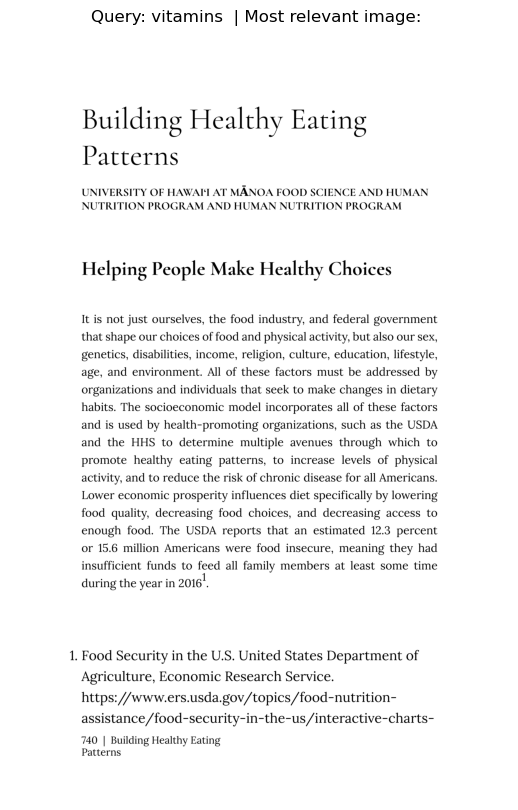

In [56]:
page_view(query, 822)